### A Quick Look At Police Shooting Data

Black Lives Matter has sparked an intense debate across the United States. This debate that is necessary for us to grow as a country. BLM raises questions that deserve consideration and thoughtful discussion. I consider this discussion to currently be ongoing (although not always rooted in consideration and thoughtfulness) based on my social media feeds. 

In any discussion it is important for all sides to be heard, considered and addressed in a reasonable manner. I know this is a very heated subject and that not everyone will be happy with what I have to say here, but please be kind enough to read to the end and consider what is presented here.

My hope is to address an issue that I've seen brought up more often in discussion lately, that I feel is slightly misguided. This has to do with the statistical fact that more white people are shot by police than black people in the US. For those that aren't familiar with this course of discussion, here are some arguments citing police shooting data:  
(**Disclaimer:** These sources can be fairly harsh. For just a quick overview of the relevant info, check the infographic link)

[Ben Shapiro on BLM](https://www.facebook.com/subjectpolitics/videos/1740982886119264/)  
[American Thinker Article](http://www.americanthinker.com/blog/2016/07/study_cops_kill_more_whites_than_blacks_but_minority_deaths_generate_more_coverage.html)  
[Zero Hegde Infographic](http://www.zerohedge.com/news/2016-07-08/breakdown-us-citizens-killed-cops-2016)  
(I will be using the same data set that this infographic cites, along with US Census data for 2016)

My concern is that although this point is statistically accurate, it only tells part of the story and doesn't correctly frame the issue that BLM aims to bring attention to. Essentially, this course of discussion is an apples and oranges comparison.

**TL;DR:** Prominent voices in the alt-right community have misunderstood and statistically misrepresented the message of the BLM movement. This will be explored through police shooting data and US Census Data for 2016.

In [2]:
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

First, we will take a quick look at the data. There are a lot of interesting things we could look at here. However, for our purposes, we will focus on race and whether the person was armed or not. 

In [3]:
shootings_df = pd.read_csv('./data-police-shootings-master/fatal-police-shootings-data.csv')
shootings_df.head()

,id,name,date,manner_of_death,armed,age,gender,race,city,state,signs_of_mental_illness,threat_level,flee,body_camera
0,3,Tim Elliot,2015-01-02,shot,gun,53.0,M,A,Shelton,WA,True,attack,Not fleeing,False
1,4,Lewis Lee Lembke,2015-01-02,shot,gun,47.0,M,W,Aloha,OR,False,attack,Not fleeing,False
2,5,John Paul Quintero,2015-01-03,shot and Tasered,unarmed,23.0,M,H,Wichita,KS,False,other,Not fleeing,False
3,8,Matthew Hoffman,2015-01-04,shot,toy weapon,32.0,M,W,San Francisco,CA,True,attack,Not fleeing,False
4,9,Michael Rodriguez,2015-01-04,shot,nail gun,39.0,M,H,Evans,CO,False,attack,Not fleeing,False


[Data Source from Washington Post](https://www.washingtonpost.com/graphics/national/police-shootings/)  
I encourage you to check this link out, it has some great interactive visualizations to play with as well as a link to the data that I am using here.

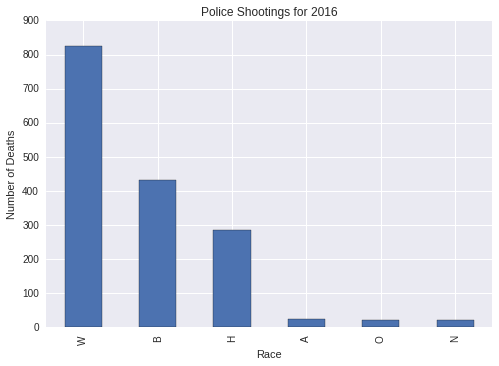

In [4]:
shootings_df['race'].value_counts().plot(kind='bar')
plt.title("Police Shootings for 2016")
plt.ylabel("Number of Deaths")
plt.xlabel("Race")

Here we can see that the claims made are reproducible. In terms of count, more white people than black people have been shot this year by police. However, this really only scratches the surface. We still don't know whether they were armed or not and we don't know how this compares to the total populations for each of these races.  
  
Let's start by taking a look at demographic populations as counted by the US Census. The data I am using can be found [here](http://www.census.gov/quickfacts/table/PST045215/00).

As you can see from following the link, this table contains the total US population as well as estimates for the the percent population of various demographics based on US Census Data. Since we are still dealing in raw counts, we will need to do a simple calculation to get exactly what we are looking for. 

To get the population conuts, I multiply the total population by demographic percentage then divide by one-hundred for to calculate the population counts for white, black and hispanic populations. 

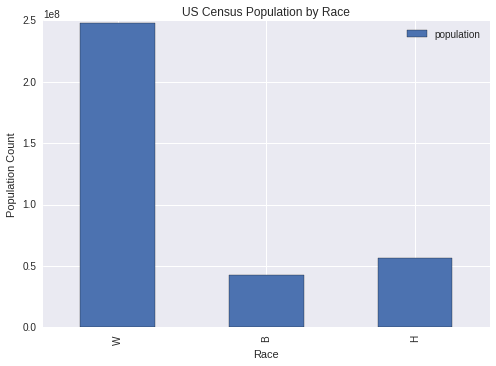

In [10]:
census_df = pd.read_csv('./census-data/demographic-populations.csv')

population_df = pd.DataFrame({
    "population" : [float(census_df['UNITED STATES'][1]) * float(census_df['UNITED STATES'][15]) / 100,
                    float(census_df['UNITED STATES'][1]) * float(census_df['UNITED STATES'][17]) / 100, 
                    float(census_df['UNITED STATES'][1]) * float(census_df['UNITED STATES'][27]) / 100]},
     index = ["W", "B", "H"])  

population_df.plot(kind = "bar")
plt.title("US Census Population by Race")
plt.ylabel("Population Count")
plt.xlabel("Race")

Here we can see that the story we started with is changing considerably. It is much less surprising that more white people are shot by police when consider that there are five times as many white people as there are black or hispanic people.

Going further, there is a greater difference between the size of these populations when compared to police shootings.

Let's take a look at what percentage of each of these groups was shot by police in 2016. 

To get the percentage of each group, I divide the count of police shootings by race by the total population and multiply by one hundred.

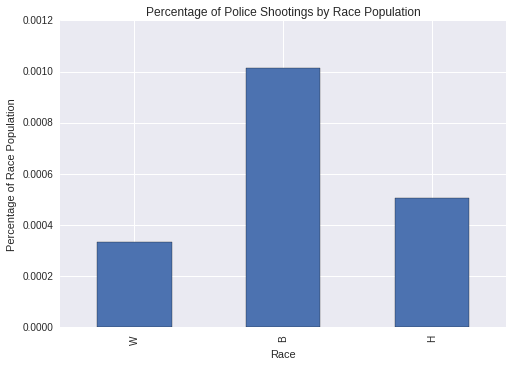

In [11]:
shootings_by_population = shootings_df["race"].value_counts()[0:3]/population_df["population"] * 100

shootings_by_population.plot(kind = "bar")
plt.title("Percentage of Police Shootings by Race Population")
plt.ylabel("Percentage of Race Population")
plt.xlabel("Race")

The good news for everyone is that **the odds of being shot by a police officer are generally statistically low**. So don't be afraid to wave, smile or give a friendly nod to the next police officer you see.  

However, what is troubling is that that **black and hispanic people face a higher risk of being involved in a police shooting**, despite making up a relatively small part of the total US Population. **Especially black people, who are almost three times as likely to be involved in a police shooting.**

So far, we've ignored whether these people were armed or not. This could change a number of things. So, let's look into that now.

In [12]:
shootings_df['armed'].value_counts().head()

gun             962
knife           251
unarmed         136
vehicle          98
undetermined     73
Name: armed, dtype: int64

Generally speaking, it appears that less than 1 in 10 of police shootings result in the death of unarmed citizens. Which is probably pretty good? I'm a little torn on this one, as there are some very strange and concerning cases. Such as a person listed as armed with a "stapler"... We can say with some certainty though that in many of these cases, the police acted with probable cause. 

Now lets take a look at what happens when we filter our police shootings to only include unarmed citizens.

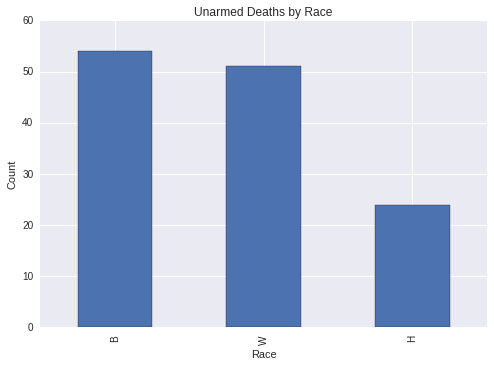

In [14]:
unarmed_df = shootings_df[shootings_df["armed"] == "unarmed"]

unarmed_df["race"].value_counts()[0:3].plot(kind = "bar")
plt.title("Unarmed Deaths by Race")
plt.ylabel("Count")
plt.xlabel("Race")

From this graph we can see that the number of unarmed people killed in police shootings are much closer than the number of people killed in shootings in general and favors black people by a small margin. Similar to the first graph that we looked at, the count can't tell us the full story. Remember, the population of white people shot by the police and the general white population greatly outnumbers these two groups. 

To fully understand the differences here, we should look at the percentage of each group that was shot unarmed. To do this, I will take the number of unarmed people shot divided by the number of people shot in total times one-hundred, for each ethnic group.

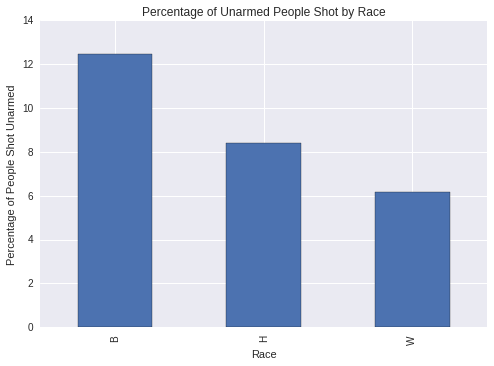

In [15]:
percentage_shootings = unarmed_df["race"].value_counts()[0:3]/shootings_df["race"].value_counts()[0:3] * 100

percentage_shootings.plot(kind = "bar")
plt.title("Percentage of Unarmed People Shot by Race")
plt.ylabel("Percentage of People Shot Unarmed")
plt.xlabel("Race")

Again, we see a troubling trend here. **The percentage of unarmed people killed in police shootings is disproportionately higher for black people and hispanic people than it is for white people**, despite these two groups making up less of the total shootings. **In the case of the black population the percentage of unarmed shootings is twice that of the white population.**

This gap is even larger if we look at the number of unarmed people shot by police officers compared to the total population...

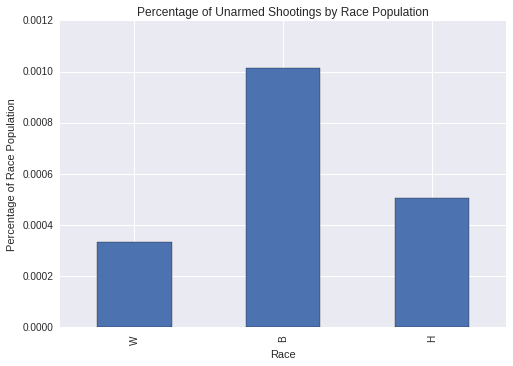

In [61]:
unarmed_by_population = shootings_df["race"].value_counts()[0:3]/population_df["population"] * 100

unarmed_by_population.plot(kind = "bar")
plt.title("Percentage of Unarmed Shootings by Race Population")
plt.ylabel("Percentage of Race Population")
plt.xlabel("Race")

When we look at the percentage of total demographic populations we can see that the percentage of unarmed black people killed is now closer to three times that of the white population. 

So, I hope that you can see that the statistical fact that more white people are killed every year by police is only true in the most superficial sense. The reality is that a considerably greater percentage of unarmed black people were killed in police shootings this year and these are the numbers we should be looking at and working to change. How we should go about fixing this is part of the discussion too, a part that I am not qualified to talk on. Awareness is the first step towards that discussion. Please share this if you think it can help spread awareness.

Also let me know if something is not clear here and I can try to rewrite it to make it a bit clearer.

Thanks for reading,  
Tyler